In [1]:
#importing the libraries 
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data
df = pd.read_csv("datasets_228_482_diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#data's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

there are 768 rows and 9 colums 

In [5]:
df.isnull().values.any()

False

there is no null values in the dataset 

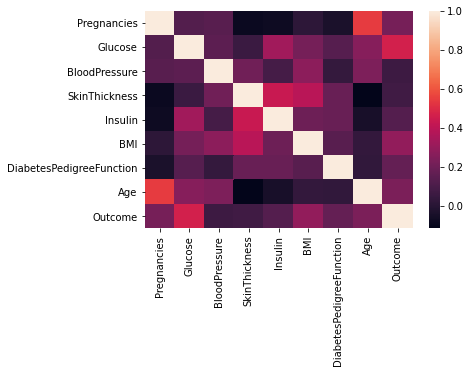

In [6]:
#creating heat map
sns.heatmap(df.corr())

Checking the outliers

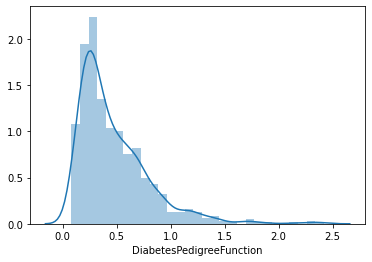

In [7]:
sns.distplot(df['DiabetesPedigreeFunction'] )

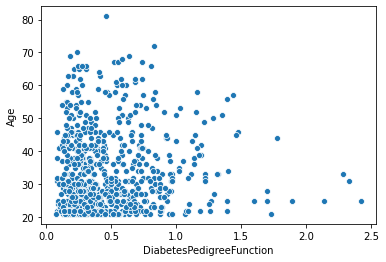

In [8]:
sns.scatterplot( x = 'DiabetesPedigreeFunction' ,y = 'Age' , data = df )

In [9]:
#droping the outliers
df = df.drop(df[df['DiabetesPedigreeFunction'] > 1.5 ].index)

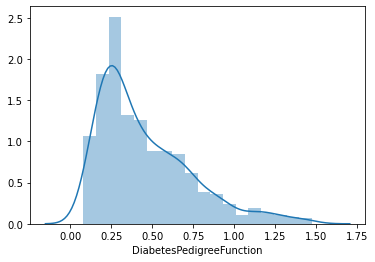

In [10]:
sns.distplot(df['DiabetesPedigreeFunction'] )

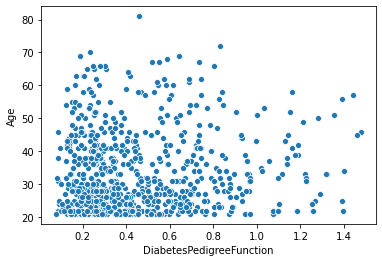

In [11]:
sns.scatterplot( x = 'DiabetesPedigreeFunction' ,y = 'Age' , data = df )

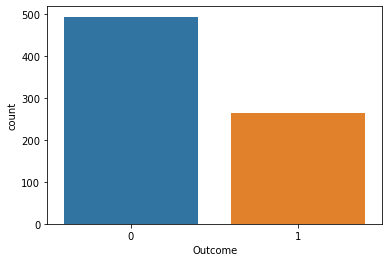

In [12]:
sns.countplot(df.Outcome)

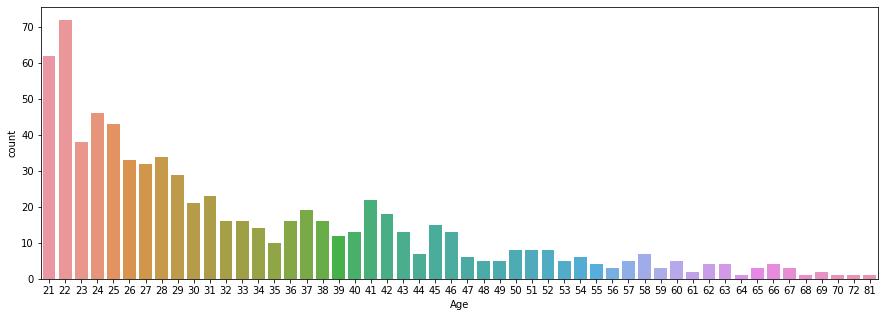

In [42]:
plt.figure(figsize=(15,5))
sns.countplot(df.Age)

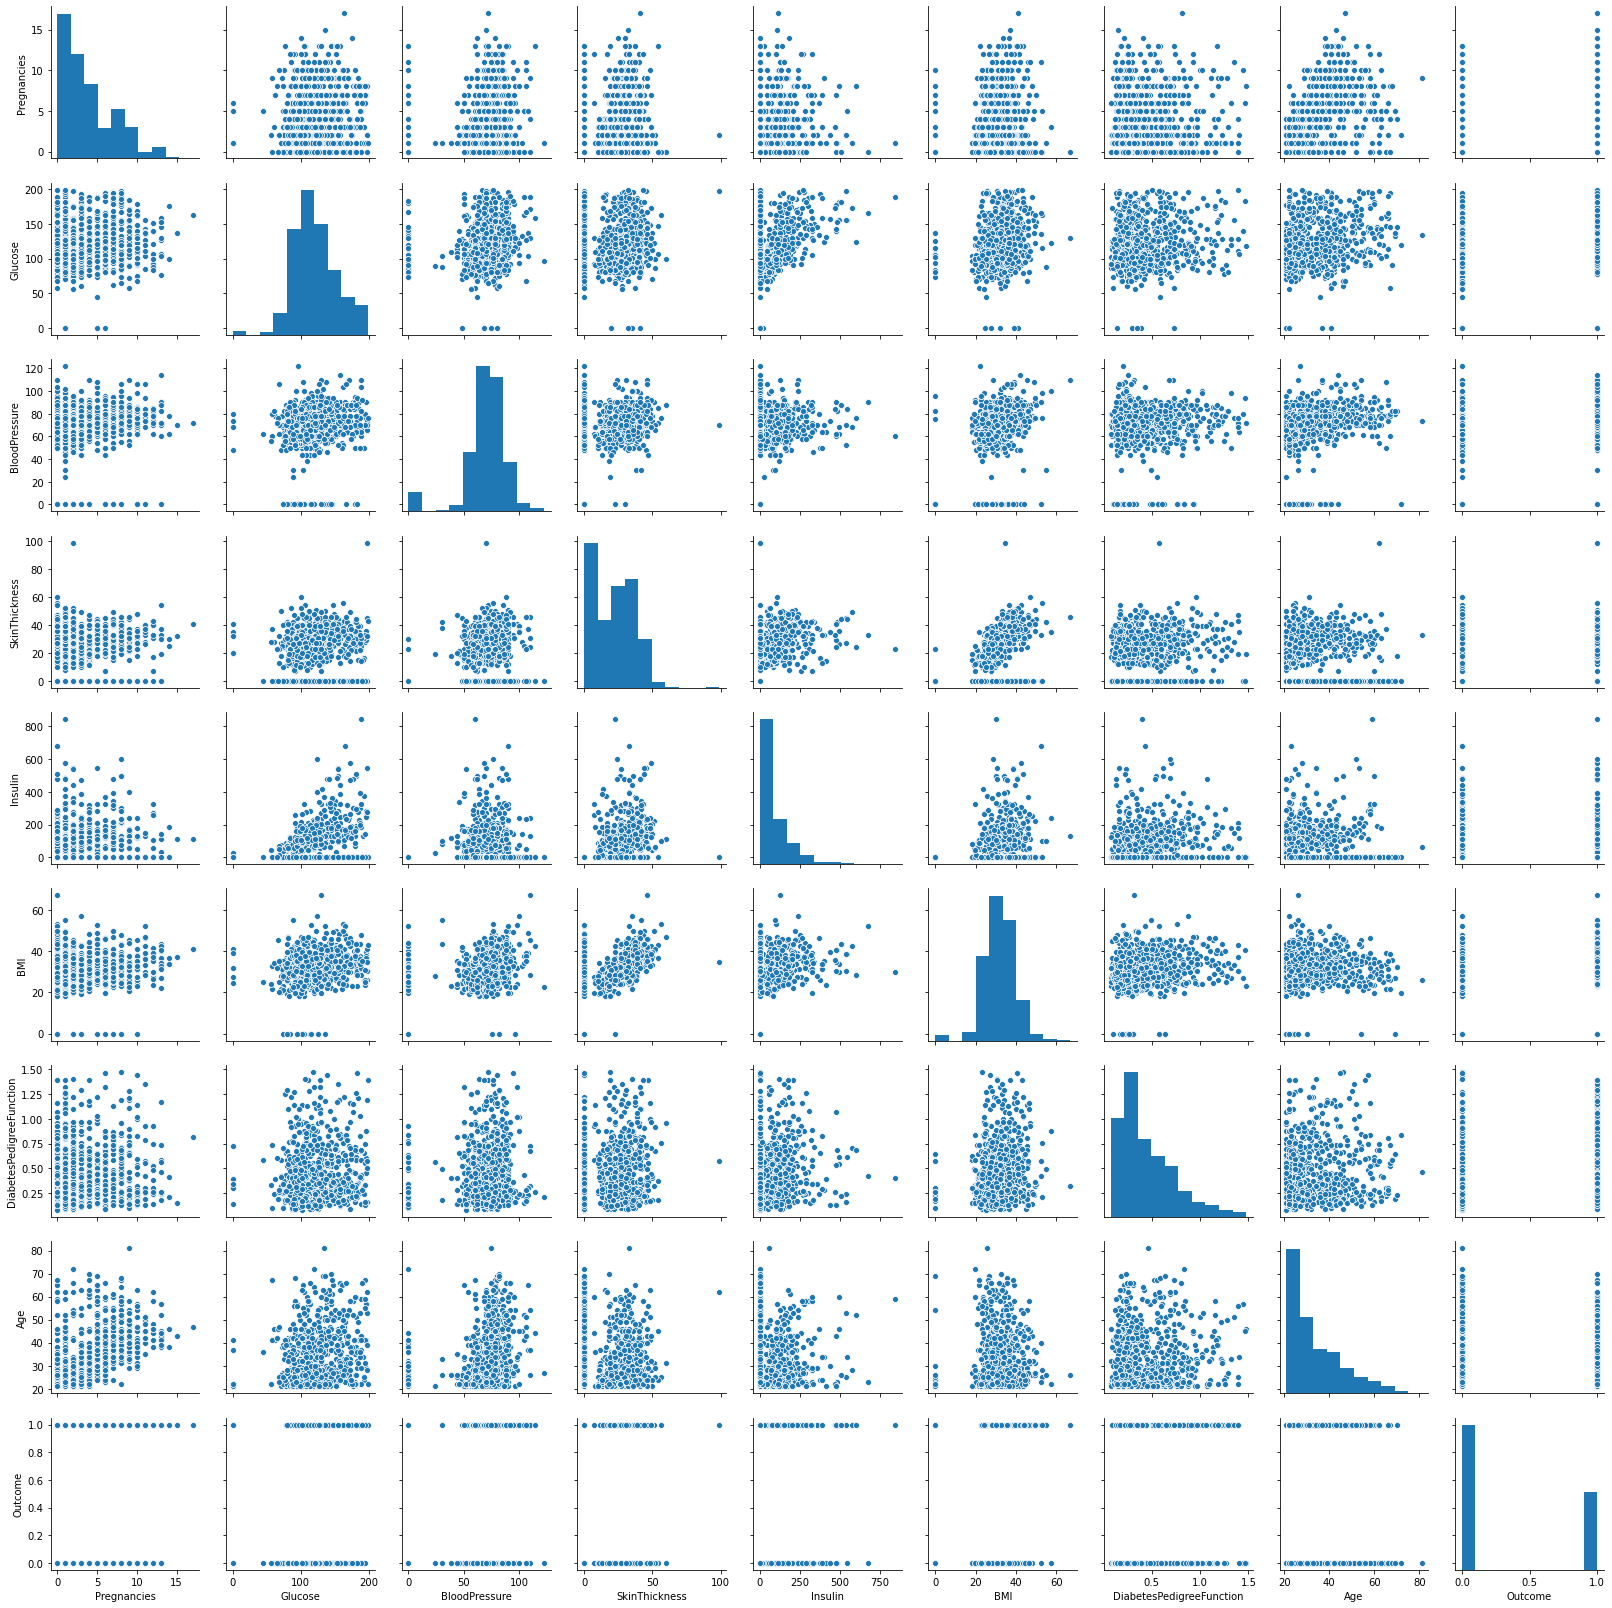

In [13]:
sns.pairplot(df)

Spliting the data to training and testing 

In [14]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.33 , random_state = 0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# By using logistic regression 

In [22]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_pred = classification.predict(x_test)

y_pred

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.796812749003984

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[143,  14],
       [ 37,  57]], dtype=int64)

By using logisticregression we got the accuracy of 79%

## by using K-Nearest Neighboring

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [33]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [34]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [35]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.5019920318725 % and k = [12]


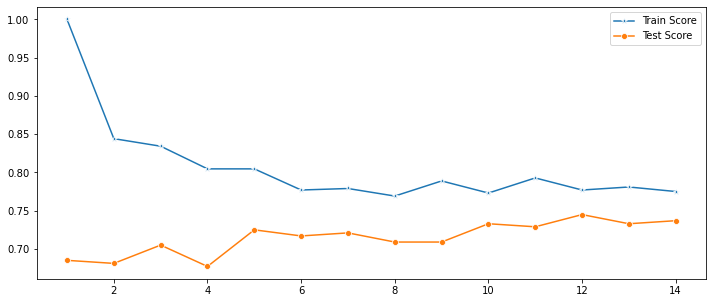

In [36]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [49]:
knn = KNeighborsClassifier(12)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [46]:
y_predknn = knn.predict(x_test)

In [47]:
y_predknn

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [48]:
accuracy_score(y_test,y_predknn)

0.7450199203187251

In [50]:
cm_knn = confusion_matrix(y_test,y_pred)
cm_knn

array([[143,  14],
       [ 37,  57]], dtype=int64)

By using K-Nearest Neighboring we got the accuracy of 74%